# Visualization of (Weakly) Typical Sequences

In [1]:
import numpy as np
from scipy.special import comb

import matplotlib.pyplot as plt

A stationary source $X$ outputs symbols from $\{a, b\}$ independently of each other with the probabilities $p_\text{a}=\frac34$ and $p_\text{b}=\frac14$. In the following, use $\epsilon=\delta=\alpha\log_2\bigl(\frac{p_\text{a}}{p_\text{b}}\bigr)$ (with $\alpha = \frac{1}{10}$) and consider the product source $X^n$ with $n=10$.

In [2]:
p_a = 0.75
alpha = 0.1
n = 10

def get_epsilon(alpha, p_a):
    return alpha * np.log2(p_a / (1 - p_a))

def get_delta(alpha, p_a):
    return get_epsilon(alpha, p_a)

def get_entropy(p_a):
    return -p_a * np.log2(p_a) - (1 - p_a) * np.log2(1 - p_a)

Let $n_\text{a}$ be the number of $a$ in a meta symbol. E.g., for $abbaaabaab$ we have $n_\text{a} = 6$. After some derivation, we find that any sequence with
$$n (p_\text{a} - \alpha) < n_\text{a} < n (p_\text{a} + \alpha)$$
is weakly typical.

In [3]:
def get_typicality_limits(n, p_a, alpha):
    return n * (p_a - alpha), n * (p_a + alpha)

def get_typical_na(n, p_a, alpha):
    lower, upper = get_typicality_limits(n, p_a, alpha)
    return np.arange(n)[(lower < np.arange(n)) & (np.arange(n) < upper)]

get_typical_na(n, p_a, alpha)

array([7, 8])

We know from the lecture: For each $\varepsilon>0$, each $\delta>0$, and for sufficiently large $n$:
$$1 - \varepsilon \leq P(T(n, \delta))$$
$$(1-\varepsilon)2^{n(H(X)-\delta)} < |T(n, \delta)| < 2^{n(H(X)+\delta)}$$

Let us first examine the second statement about the number of typical sequences.

Number of typical sequences: 165
The inequality 77.65 < 165 < 830.4 holds!


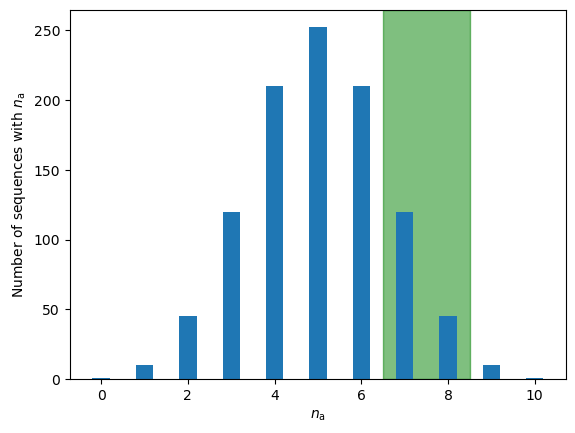

In [4]:
def plot_sequence_number(n, p_a, alpha):
    # Highlight range of n_a where sequences are typical
    lower_na, upper_na = get_typicality_limits(n, p_a, alpha)
    plt.gca().fill_between([lower_na, upper_na], 0, 1, alpha=0.5, color='green', transform=plt.gca().get_xaxis_transform())

    # Plot how many sequences exist for each n_a
    na_range = np.arange(n + 1)
    number_of_sequences = np.array([comb(n, na) for na in na_range])
    plt.bar(na_range, number_of_sequences, width=0.4)

    # Compute upper and lower bound on number of typical sequences
    epsilon = get_epsilon(alpha, p_a)
    delta = get_delta(alpha, p_a)
    entropy = get_entropy(p_a)

    upper_num_typical = 2**(n * (entropy + delta))
    lower_num_typical = (1 - epsilon) * 2**(n * (entropy - delta))

    # Compute exact number of typical sequences
    num_typical_seq = sum([comb(n, na, exact=True) for na in get_typical_na(n, p_a, alpha)])

    print(f'Number of typical sequences: {num_typical_seq:.4g}')
    if lower_num_typical < num_typical_seq < upper_num_typical:
        print(f'The inequality {lower_num_typical:.4g} < {num_typical_seq:.4g} < {upper_num_typical:.4g} holds!')
    else:
        print(f'The inequality {lower_num_typical:.10g} < {num_typical_seq:.10g} < {upper_num_typical:.10g} does not hold!')

    plt.xlabel(r'$n_\text{a}$')
    plt.ylabel(r'Number of sequences with $n_\text{a}$')
    plt.show()

plot_sequence_number(n, p_a, alpha)

Now let's look at the statement: $1 - \varepsilon \leq P(T(n, \delta))$

0.8415 = (1 - Ɛ) > P(T(10,0.1585)) = 0.5318 ⚡


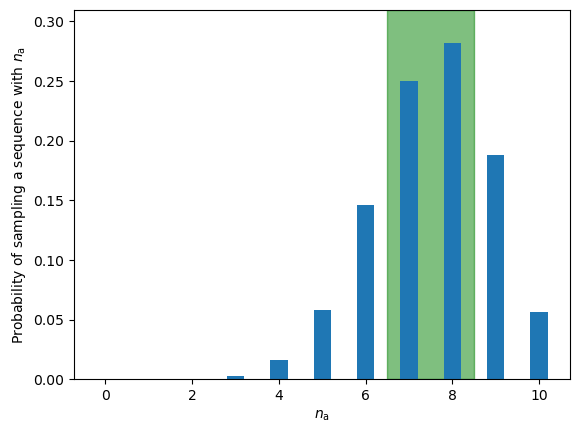

In [5]:
def plot_sequence_probability(n, p_a, alpha):
    # Highlight range of n_a where sequences are typical
    lower_na, upper_na = get_typicality_limits(n, p_a, alpha)
    plt.gca().fill_between([lower_na, upper_na], 0, 1, alpha=0.5, color='green', transform=plt.gca().get_xaxis_transform())

    # Plot probability of sampling a sequence with n_a (binomial distribution)
    na_range = np.arange(n + 1)
    probability_of_sequences = np.array([comb(n, na) * p_a**na * (1 - p_a)**(n - na) for na in na_range])
    plt.bar(na_range, probability_of_sequences, width=0.4)

    # Compute probability of sampling a typical sequence
    prob_typical_seq = np.sum(probability_of_sequences[get_typical_na(n, p_a, alpha)])

    lower = 1 - get_epsilon(alpha, p_a)
    print(f'{lower:.4g} = (1 - Ɛ)', end=' ')
    print('≤' if lower < prob_typical_seq else '\x1b[31m>\x1b[0m', end=' ')
    print(f'P(T({n},{get_delta(alpha, p_a):.4g})) = {prob_typical_seq:.4g}', end=' ')
    print('✔' if lower < prob_typical_seq else '\x1b[31m⚡\x1b[0m')

    plt.xlabel(r'$n_\text{a}$')
    plt.ylabel(r'Probability of sampling a sequence with $n_\text{a}$')
    plt.ylim(0, 1.1 * max(probability_of_sequences))
    plt.show()

plot_sequence_probability(n, p_a, alpha)